C:\Users\TGY\AppData\Local\Temp\ipykernel_122164\2385075966.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


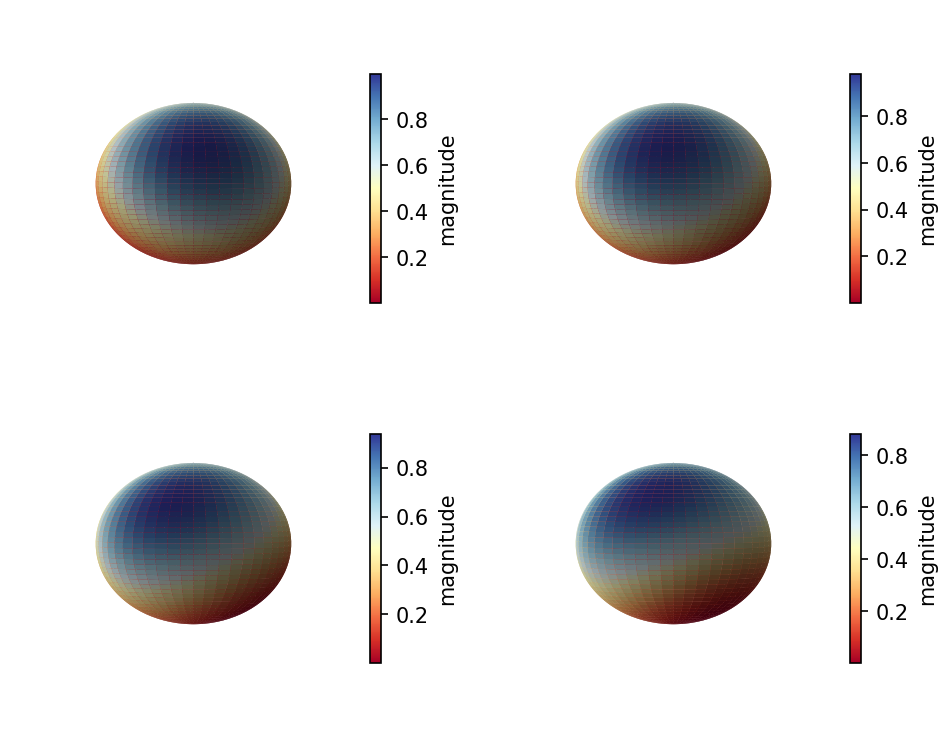

In [1]:
# 一、N原子系综自旋概率分布
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
 
n=2#原子数
j = n//2
psi0 = spin_coherent(j, np.pi/3, 0)#设置系统的初态为自旋相干态
 
Jp=destroy(2*j+1).dag()#升算符
J_=destroy(2*j+1)#降算符
Jz=(Jp*J_-J_*Jp)/2#Jz
 
H=Jz**2#系统的哈密顿量
 
tlist=np.linspace(0,3,100)#时间列表
result=mesolve(H,psi0,tlist)#态随时间的演化
 
theta=np.linspace(0, np.pi, 50)
phi=np.linspace(0, 2*np.pi, 50)
 
#分别计算四个状态下的 husimi q函数
Q1, THETA1, PHI1 = spin_q_function(result.states[0], theta, phi)
Q2, THETA2, PHI2 = spin_q_function(result.states[30], theta, phi)
Q3, THETA3, PHI3 = spin_q_function(result.states[60], theta, phi)
Q4, THETA4, PHI4 = spin_q_function(result.states[90], theta, phi)
 
#在四个子图中分别画出四个状态下的husimi q函数
fig = plt.figure(dpi=150,constrained_layout=1)
ax1 = fig.add_subplot(221,projection='3d')
ax2 = fig.add_subplot(222,projection='3d')
ax3 = fig.add_subplot(223,projection='3d')
ax4 = fig.add_subplot(224,projection='3d')
 
plot_spin_distribution_3d(Q1, THETA1, PHI1,fig=fig,ax=ax1)
plot_spin_distribution_3d(Q2, THETA2, PHI2,fig=fig,ax=ax2)
plot_spin_distribution_3d(Q3, THETA3, PHI3,fig=fig,ax=ax3)
plot_spin_distribution_3d(Q4, THETA4, PHI4,fig=fig,ax=ax4)
 
for ax in [ax1,ax2,ax3,ax4]:
 ax.view_init(0.5*np.pi, 0)
 ax.axis('off')#不显示坐标轴
 
fig.show()

C:\Users\TGY\AppData\Local\Temp\ipykernel_122164\1463304955.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


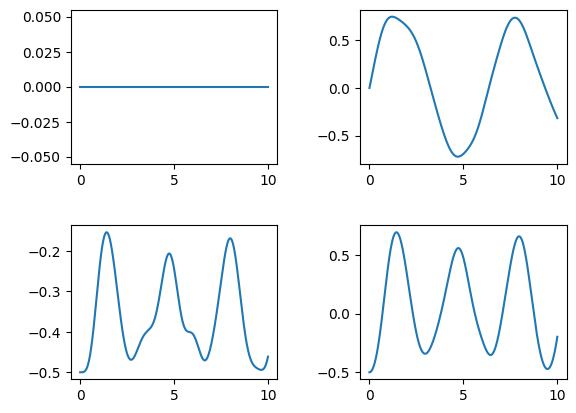

In [2]:
# 二、原子与光场相互作用
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
alpha=1#相干光的参数alpha
n=2#原子数
j = n/2

psi0 = tensor(coherent(10,alpha),spin_coherent(j, 0, 0))#设置系统的初态

a=destroy(10)#光场的湮灭算符
a_plus=a.dag()#光场的产生算符
Jp=destroy(n+1).dag()#原子的升算符
J_=destroy(n+1)#原子的降算符
Jx=(Jp+J_)/2#原子的Jx算符
Jy=(Jp-J_)/(2j)#原子的Jy算符,这里的j是虚数单位
Jz=(Jp*J_-J_*Jp)/2#原子的Jz算符

H=tensor(a,Jp)+tensor(a_plus,J_)#系统的哈密顿量
tlist=np.linspace(0,10,1000)#时间列表
result=mesolve(H,psi0,tlist)#态随时间的演化

fig=plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(tlist,expect(tensor(qeye(10),Jx),result.states))#Jx的平均值随时间变化图
ax2.plot(tlist,expect(tensor(qeye(10),Jy),result.states))#Jy的平均值随时间变化图
ax3.plot(tlist,expect(tensor(qeye(10),Jz),result.states))#Jz的平均值随时间变化图
ax4.plot(tlist,expect(tensor(qeye(10),Jx**2+Jy**2+Jz*2),result.states))#J平方的平均值随时间变化图

fig.subplots_adjust(top=None,bottom=None,left=None,right=None,wspace=0.4,hspace=0.4)#设置子图间距
fig.show()